# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
import seaborn as sns
import re
from joblib import dump, load

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Фикировуя сид, мы добиваемся повторения экспериментов в той части где используется рандомизация. Например при разбиении на трейн тест.")

Фикировуя сид, мы добиваемся повторения экспериментов в той части где используется рандомизация. Например при разбиении на трейн тест.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
{"name": "Mahindra Xylo E4 BS IV",
 "year": 2010,
 "selling_price": 229999,
 "km_driven": 168000,
 "fuel": "Diesel",
 "seller_type": "Individual",
 "transmission": "Manual",
 "owner": "First Owner",
 "mileage": "14.0 kmpl",
 "engine": "2498 CC",
 "max_power": "112 bhp",
 "torque": "260 Nm at 1800-2200 rpm",
 "seats": 7.0}

{'name': 'Mahindra Xylo E4 BS IV',
 'year': 2010,
 'selling_price': 229999,
 'km_driven': 168000,
 'fuel': 'Diesel',
 'seller_type': 'Individual',
 'transmission': 'Manual',
 'owner': 'First Owner',
 'mileage': '14.0 kmpl',
 'engine': '2498 CC',
 'max_power': '112 bhp',
 'torque': '260 Nm at 1800-2200 rpm',
 'seats': 7.0}

In [5]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
print(f"missing vals for train in columns: {list(set(df_train.columns.to_list()) - set(df_train.dropna(how='any',axis=1).columns.to_list()))}")

missing vals for train in columns: ['torque', 'engine', 'seats', 'mileage', 'max_power']


In [12]:
print(f"missing vals for test in columns: {list(set(df_test.columns.to_list()) - set(df_test.dropna(how='any',axis=1).columns.to_list()))}")

missing vals for test in columns: ['torque', 'engine', 'seats', 'mileage', 'max_power']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
df_train.drop(columns=["selling_price"]).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
df_train[df_train.duplicated() == True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
idx_dupl = df_train.drop(columns=['selling_price']).drop_duplicates(keep='first').index.to_list()

In [16]:
df_train = df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns.to_list())

In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
### mileage

In [20]:
df_train[['mileage', 'engine', 'max_power', 'torque']].sample(2)

,mileage,engine,max_power,torque
635,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm
3423,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm


In [21]:
df_train[['mileage','m_units']] = df_train['mileage'].str.split(' ', n=1, expand=True)
df_test[['mileage','m_units']] = df_test['mileage'].str.split(' ', n=1, expand=True)

In [22]:
df_train['mileage'] = df_train['mileage'].astype('float')
df_test['mileage'] = df_test['mileage'].astype('float')

In [23]:
df_train['m_units'].value_counts()

kmpl     5577
km/kg      77
Name: m_units, dtype: int64

In [24]:
df_test['m_units'].value_counts()

kmpl     972
km/kg      9
Name: m_units, dtype: int64

In [25]:
### engine

In [26]:
df_train[['engine','e_units']] = df_train['engine'].str.split(' ', 1, expand=True)
df_test[['engine','e_units']] = df_test['engine'].str.split(' ', 1, expand=True)

/tmp/ipykernel_87908/761654337.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_train[['engine','e_units']] = df_train['engine'].str.split(' ', 1, expand=True)
/tmp/ipykernel_87908/761654337.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_test[['engine','e_units']] = df_test['engine'].str.split(' ', 1, expand=True)


In [27]:
df_train['engine'] = df_train['engine'].astype('float')
df_test['engine'] = df_test['engine'].astype('float')

In [28]:
df_train['e_units'].value_counts()

CC    5654
Name: e_units, dtype: int64

In [29]:
df_test['e_units'].value_counts()

CC    981
Name: e_units, dtype: int64

In [30]:
df_train = df_train.drop(columns=['e_units'])
df_test = df_test.drop(columns=['e_units'])

In [31]:
### max_power

In [32]:

df_train[['max_power','p_units']] = df_train['max_power'].str.split(' ', 1, expand=True)
df_test[['max_power','p_units']] = df_test['max_power'].str.split(' ', 1, expand=True)

/tmp/ipykernel_87908/1894777017.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_train[['max_power','p_units']] = df_train['max_power'].str.split(' ', 1, expand=True)
/tmp/ipykernel_87908/1894777017.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_test[['max_power','p_units']] = df_test['max_power'].str.split(' ', 1, expand=True)


In [33]:
df_train.loc[df_train[df_train['max_power']==''].index, 'max_power'] = np.nan
df_test.loc[df_test[df_test['max_power']==''].index, 'max_power'] = np.nan

In [34]:
df_train['max_power'] = df_train['max_power'].astype('float')
df_test['max_power'] = df_test['max_power'].astype('float')

In [35]:
df_train['p_units'].value_counts()

bhp    5654
Name: p_units, dtype: int64

In [36]:
df_test['p_units'].value_counts()

bhp    981
Name: p_units, dtype: int64

In [37]:
df_train = df_train.drop(columns=['p_units'])
df_test = df_test.drop(columns=['p_units'])

In [38]:
### max_power

In [39]:
df_train[['torque']]

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,22.4 kgm at 1750-2750rpm
3,"11.5@ 4,500(kgm@ rpm)"
4,113.75nm@ 4000rpm
...,...
5835,96.1Nm@ 3000rpm
5836,90Nm@ 3500rpm
5837,113.7Nm@ 4000rpm
5838,"24@ 1,900-2,750(kgm@ rpm)"


In [40]:
df_train["torque_vals"] = df_train.apply(lambda x: [i for i in re.sub('[^0-9.]',' ', re.sub(',','', str(x['torque']))).split(' ') if i != ''],axis=1)
df_test["torque_vals"] = df_test.apply(lambda x: [i for i in re.sub('[^0-9.]',' ', re.sub(',','.', str(x['torque']))).split(' ') if i != ''],axis=1)

In [41]:
df_train["torque1"] = df_train.apply(lambda x: float(x["torque_vals"][0]) if len(x["torque_vals"])>0 else np.nan, axis=1)
df_test["torque1"] = df_test.apply(lambda x: float(x["torque_vals"][0]) if len(x["torque_vals"])>0 else np.nan, axis=1)

df_train["torque2"] = df_train.apply(lambda x: mean([float(i) for i in x["torque_vals"][1:]]) if len(x["torque_vals"][1:])>0 else np.nan, axis=1)
df_test["torque2"] = df_test.apply(lambda x: mean([float(i) for i in x["torque_vals"][1:]]) if len(x["torque_vals"][1:])>0 else np.nan, axis=1)

In [42]:
def nm_torque(x):
    if 'nm' in x:
        return 'nm'
    elif 'nn' in x:
        return 'nn'
    elif 'kgm' in x:
        return 'kgm'
    else:
        return np.nan


def rpm_torque(x):
    if 'rpm' in x:
        return 'rpm'
    else:
        return np.nan

In [43]:
df_train['t_units'] = df_train.apply(lambda x: nm_torque((re.sub('[^nrpmkg ]','',str(x['torque']).lower())).split()), axis=1)
df_test['t_units'] = df_test.apply(lambda x: nm_torque((re.sub('[^nrpmkg ]','',str(x['torque']).lower())).split()), axis=1)

In [44]:
df_train['t_units'].value_counts()

nm     5231
kgm     412
nn      187
Name: t_units, dtype: int64

In [45]:
df_test['t_units'].value_counts()

nm     919
kgm     61
nn      19
Name: t_units, dtype: int64

In [46]:
df_train = df_train.drop(columns=['torque','torque_vals'])
df_test = df_test.drop(columns=['torque','torque_vals'])

In [47]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,m_units,torque1,torque2,t_units
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,kmpl,190.00,2000.0,nm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,kmpl,250.00,2000.0,nm
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,kmpl,22.40,2250.0,kgm
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,kmpl,11.50,4500.0,kgm
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,kmpl,113.75,4000.0,nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0,kmpl,96.10,3000.0,nm
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,kmpl,90.00,3500.0,nm
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,kmpl,113.70,4000.0,nm
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,kmpl,24.00,2325.0,kgm


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [48]:
train_median = df_train.median()

/tmp/ipykernel_87908/2461019953.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_median = df_train.median()


In [49]:
train_median = pd.Series(data={'year': 2014.0,
 'selling_price': 405000.0,
 'km_driven': 70000.0,
 'mileage': 19.369999999999997,
 'engine': 1248.0,
 'max_power': 81.86,
 'seats': 5.0,
 'torque1': 150.0,
 'torque2': 2400.0})

In [50]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,m_units,torque1,torque2,t_units
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,kmpl,190.0,2000.0,nm


In [51]:
df_train = df_train.fillna(train_median)
df_test = df_test.fillna(train_median)

In [52]:
df_train = df_train.fillna(train_median)



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [53]:
print("касательно seats никто не сказал что иметь 2 сидения в 2 раза дороже/дешевле чем 4 сиденья и тд поэтому тут лучше использовать категорию. Однозначного ответа нет, надо пробовать оба варианта")

касательно seats никто не сказал что иметь 2 сидения в 2 раза дороже/дешевле чем 4 сиденья и тд поэтому тут лучше использовать категорию. Однозначного ответа нет, надо пробовать оба варианта


In [54]:
df_train['seats'].value_counts()

5.0     4618
7.0      800
8.0      191
4.0       94
9.0       68
6.0       48
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [55]:
df_test['seats'].value_counts()

5.0    777
7.0    161
4.0     24
8.0     23
6.0      8
9.0      7
Name: seats, dtype: int64

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [56]:
df_train_c = df_train.copy()
df_test_c = df_test.copy()

df_train_c['train_test'] = 1
df_test_c['train_test'] = 0

df = pd.concat([df_train_c, df_test_c])

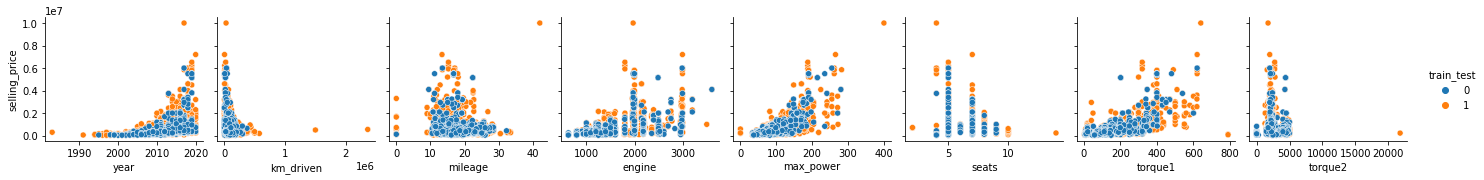

In [57]:
pp = sns.pairplot(
    data=df,
    hue='train_test',
    y_vars=['selling_price'],
    x_vars=df_train.drop(columns=['selling_price']).select_dtypes(exclude='O').columns.to_list())    


Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Кажется, что связь таргета с year, km_driven, mileage, engine признакми не линейная. Max_power обладает более линейной кореляцией с таргетом 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Похоже

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [58]:
df_train[df_train.select_dtypes(exclude='O').drop(columns=['selling_price']).columns.to_list()].corr().abs().unstack().reset_index(drop=False).drop_duplicates(subset=[0],keep='first').sort_values(by=[0])[:-1].head(2)

,level_0,level_1,0
3,year,engine,0.002819
12,km_driven,max_power,0.024588


<AxesSubplot: >

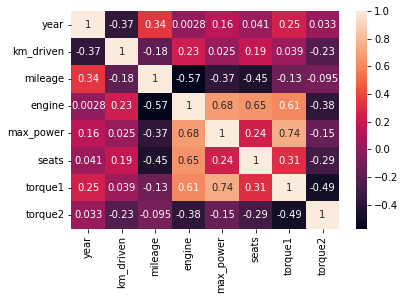

In [59]:
sns.heatmap(df_train[df_train.select_dtypes(exclude='O').drop(columns=['selling_price']).columns.to_list()].corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Какие 2 признака наименее скоррелированы между собой?

In [60]:
df_train[df_train.select_dtypes(exclude='O').drop(columns=['selling_price']).columns.to_list()].corr().abs().unstack().reset_index(drop=False).drop_duplicates(subset=[0],keep='first').sort_values(by=[0])[:-1].head(1)

,level_0,level_1,0
3,year,engine,0.002819


Между какими наблюдается довольно сильная положительная линейная зависимость?

In [61]:
df_train[df_train.select_dtypes(exclude='O').drop(columns=['selling_price']).columns.to_list()].corr().abs().unstack().reset_index(drop=False).drop_duplicates(subset=[0],keep='first').sort_values(by=[0])[:-1].tail(1)

,level_0,level_1,0
38,max_power,torque1,0.744652


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

/home/computer/miniconda3/envs/hse_ml/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


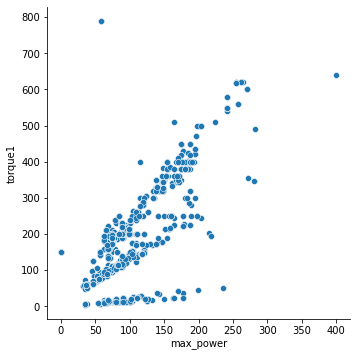

In [62]:
sns.pairplot(data=df_train,
                x_vars=['max_power'],
                y_vars=['torque1'],size=5)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [63]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [64]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price']).select_dtypes(exclude='O')

In [65]:
assert X_train.shape == (5840, 8)

In [66]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price']).select_dtypes(exclude='O')

In [67]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [69]:
print(f"train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")

train R2 0.603 train MSE 113813719489.552


In [70]:
print(f"test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")

test R2 0.598 test MSE 230860494993.665


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_ts = sc.transform(X_train)
X_test_ts = sc.transform(X_test)

model = LinearRegression()
model.fit(X_train_ts, y_train)
y_pred_train = model.predict(X_train_ts)
y_pred_test = model.predict(X_test_ts)

In [72]:
print(f"train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")

train R2 0.603 train MSE 113813719489.552


In [73]:
print(f"test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")

test R2 0.598 test MSE 230860494993.665


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [74]:
X_train.iloc[:,list(model.coef_).index(max(model.coef_))].name

'max_power'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [75]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_ts, y_train)
y_pred_train = model.predict(X_train_ts)
y_pred_test = model.predict(X_test_ts)

In [76]:
print(f"train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")

train R2 0.603 train MSE 113813719503.304


In [77]:
print(f"test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")

test R2 0.598 test MSE 230861107343.496


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [78]:
model.coef_

array([160823.29341509, -49058.89116482, -12658.04066119,  15595.42566476,
       303450.04977928, -33757.73176182,  38401.29159472, -51016.28846423])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# your code here

In [80]:
model = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13),cv=10)
model.fit(X_train_ts, y_train)
y_pred_train = model.predict(X_train_ts)
y_pred_test = model.predict(X_test_ts)

In [81]:
print(f"train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")

train R2 0.600 train MSE 114576524292.080


In [82]:
print(f"test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")

test R2 0.586 test MSE 237745532915.240


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [83]:
%%time
model.fit(X_train_ts, y_train)

CPU times: user 76.6 ms, sys: 222 ms, total: 298 ms
Wall time: 30.7 ms


LassoCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=10)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [84]:
model.alpha_

10000.0

In [85]:
model.coef_

array([147074.50763633, -39643.74492323,     -0.        ,      0.        ,
       302892.31511024,  -5041.46525937,  43329.75474033, -32373.21882259])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [86]:
from sklearn.linear_model import ElasticNet


model = linear_model.ElasticNetCV(alphas=np.logspace(-6, 6, 13),cv=10)
model.fit(X_train_ts, y_train)
y_pred_train = model.predict(X_train_ts)
y_pred_test = model.predict(X_test_ts)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [87]:
model.alpha_

0.01

In [88]:
model.coef_

array([159676.05388183, -49194.53049461, -12151.89360158,  18345.82739476,
       298294.87513736, -34286.81751497,  41914.9933863 , -48884.96352774])

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [89]:
X_train_cat = df_train.drop(columns=['selling_price','name'])
X_test_cat = df_test.drop(columns=['selling_price','name'])

In [90]:
for col in X_train_cat.columns.to_list():
    print(col, X_train_cat[col].nunique())
    print('-'*78)

year 29
------------------------------------------------------------------------------
km_driven 827
------------------------------------------------------------------------------
fuel 4
------------------------------------------------------------------------------
seller_type 3
------------------------------------------------------------------------------
transmission 2
------------------------------------------------------------------------------
owner 5
------------------------------------------------------------------------------
mileage 376
------------------------------------------------------------------------------
engine 120
------------------------------------------------------------------------------
max_power 313
------------------------------------------------------------------------------
seats 9
------------------------------------------------------------------------------
m_units 2
------------------------------------------------------------------------------
torque1 23

In [91]:
assert X_train_cat.shape == (5840, 14)

In [92]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,m_units,t_units
count,5840,5840,5840,5840,5654,5830
unique,4,3,2,5,2,3
top,Diesel,Individual,Manual,First Owner,kmpl,nm
freq,3177,5223,5336,3603,5577,5231


In [93]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner,m_units,t_units
count,1000,1000,1000,1000,981,999
unique,4,3,2,5,2,3
top,Diesel,Individual,Manual,First Owner,kmpl,nm
freq,534,837,877,623,972,919


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [94]:
cat_cols = X_train_cat.select_dtypes('O').columns.to_list()
cat_cols.append('seats')

In [95]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
OHE = OneHotEncoder(drop='first', max_categories=9, sparse=False, handle_unknown='ignore')

In [96]:
X_train_cat.describe(include='all')

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,m_units,torque1,torque2,t_units
count,5840.000000,5.840000e+03,5840,5840,5840,5840,5840.000000,5840.000000,5840.000000,5840.000000,5654,5840.000000,5840.000000,5830
unique,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,2,NaN,NaN,3
top,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,kmpl,NaN,NaN,nm
freq,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN,5577,NaN,NaN,5231
mean,2013.428425,7.395224e+04,NaN,NaN,NaN,NaN,19.430841,1429.448973,87.906371,5.426712,NaN,161.309570,2846.153228,NaN
std,4.095622,6.007114e+04,NaN,NaN,NaN,NaN,3.985973,485.662834,31.640418,0.982344,NaN,91.174286,973.350814,NaN
min,1983.000000,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000,NaN,4.800000,1269.350000,NaN
25%,2011.000000,3.900000e+04,NaN,NaN,NaN,NaN,16.950000,1197.000000,68.000000,5.000000,NaN,99.040000,2000.000000,NaN
50%,2014.000000,7.000000e+04,NaN,NaN,NaN,NaN,19.370000,1248.000000,81.860000,5.000000,NaN,150.000000,2400.000000,NaN
75%,2017.000000,1.000000e+05,NaN,NaN,NaN,NaN,22.300000,1498.000000,99.000000,5.000000,NaN,200.000000,3750.000000,NaN


In [97]:
X_test_cat.describe(include='all')

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,m_units,torque1,torque2,t_units
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.00000,1000.00000,1000.000000,1000.000000,981,1000.000000,1000.000000,999
unique,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,2,NaN,NaN,3
top,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,kmpl,NaN,NaN,nm
freq,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN,972,NaN,NaN,919
mean,2013.681000,71393.341000,NaN,NaN,NaN,NaN,19.33881,1454.87600,90.841670,5.403000,NaN,165.711010,2768.426740,NaN
std,4.012149,48486.218662,NaN,NaN,NaN,NaN,3.95175,521.99574,34.893389,0.912921,NaN,95.142648,1080.903209,NaN
min,1995.000000,1303.000000,NaN,NaN,NaN,NaN,0.00000,624.00000,34.200000,4.000000,NaN,6.100000,1.950000,NaN
25%,2011.000000,37000.000000,NaN,NaN,NaN,NaN,16.55000,1197.00000,69.000000,5.000000,NaN,99.040000,2000.000000,NaN
50%,2014.000000,61500.000000,NaN,NaN,NaN,NaN,19.37000,1248.00000,82.425000,5.000000,NaN,150.000000,2400.000000,NaN
75%,2017.000000,100000.000000,NaN,NaN,NaN,NaN,22.30000,1582.00000,102.000000,5.000000,NaN,200.500000,3800.000000,NaN


In [98]:
OHE.fit(X_train_cat[cat_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', max_categories=9,
              sparse=False)

In [99]:
from copy import deepcopy

In [100]:
cols = deepcopy(cat_cols)    

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [101]:
for col in cat_cols:    
    cols = deepcopy(cat_cols)
    cols.remove(col)    
    X_train_cat = df_train.drop(columns=['selling_price','name',col])
    X_test_cat = df_test.drop(columns=['selling_price','name',col])

    OHE.fit(X_train_cat[cols])
    X_train_ohe = pd.DataFrame(data=OHE.transform(X_train_cat[cols]), columns = list(OHE.get_feature_names_out()))
    X_test_ohe = pd.DataFrame(data=OHE.transform(X_test_cat[cols]), columns=list(OHE.get_feature_names_out()))

    X_train_con = pd.concat((X_train_cat.drop(columns=cols), X_train_ohe),axis=1)
    X_test_con = pd.concat((X_test_cat.drop(columns=cols), X_test_ohe),axis=1)

    sc = StandardScaler()
    sc.fit(X_train_con)

    X_train_ts = sc.transform(X_train_con)
    X_test_ts = sc.transform(X_test_con)

    model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13),cv=10, scoring='r2')
    model.fit(X_train_ts, y_train)
    y_pred_train = model.predict(X_train_ts)
    y_pred_test = model.predict(X_test_ts)

    print(f"drop {col}, train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")
    print(f"drop {col}, test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")
    print("-"*78)

drop fuel, train R2 0.667 train MSE 95472131862.672
drop fuel, test R2 0.613 test MSE 222390888325.308
------------------------------------------------------------------------------
drop seller_type, train R2 0.666 train MSE 95867386872.354
drop seller_type, test R2 0.604 test MSE 227387084787.754
------------------------------------------------------------------------------
drop transmission, train R2 0.663 train MSE 96502125763.319
drop transmission, test R2 0.605 test MSE 227324275065.819
------------------------------------------------------------------------------
drop owner, train R2 0.642 train MSE 102734316427.239
drop owner, test R2 0.632 test MSE 211687937664.851
------------------------------------------------------------------------------
drop m_units, train R2 0.669 train MSE 95016630237.654
drop m_units, test R2 0.614 test MSE 221708342658.344
------------------------------------------------------------------------------
drop t_units, train R2 0.665 train MSE 96133399315.

Кажется что признак owner ликует. 

In [102]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'm_units', 'torque1', 'torque2', 't_units'],
      dtype='object')

In [103]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'm_units', 'torque1', 'torque2',
       't_units'],
      dtype='object')

In [104]:
cat_cols

['fuel', 'seller_type', 'transmission', 'owner', 'm_units', 't_units', 'seats']

In [105]:
pd.read_pickle

<function pandas.io.pickle.read_pickle(filepath_or_buffer: 'FilePath | ReadPickleBuffer', compression: 'CompressionOptions' = 'infer', storage_options: 'StorageOptions' = None)>

In [106]:
for col in ['owner']:    
    cols = deepcopy(cat_cols)
    cols.remove(col)    
    X_train_cat = df_train.drop(columns=['selling_price','name',col])
    X_test_cat = df_test.drop(columns=['selling_price','name',col])


    OHE.fit(X_train_cat[cols])
    dump(OHE, 'encoder.pickle')

    X_train_ohe = pd.DataFrame(data=OHE.transform(X_train_cat[cols]), columns = list(OHE.get_feature_names_out()))
    X_test_ohe = pd.DataFrame(data=OHE.transform(X_test_cat[cols]), columns=list(OHE.get_feature_names_out()))

    X_train_con = pd.concat((X_train_cat.drop(columns=cols), X_train_ohe),axis=1)
    X_test_con = pd.concat((X_test_cat.drop(columns=cols), X_test_ohe),axis=1)

    sc = StandardScaler()
    sc.fit(X_train_con)
    dump(sc, 'scaler.pickle')

    X_train_ts = sc.transform(X_train_con)
    X_test_ts = sc.transform(X_test_con)

    model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13),cv=10, scoring='r2')
    
    model.fit(X_train_ts, y_train)
    dump(model, 'model.pickle')    
    y_pred_train = model.predict(X_train_ts)
    y_pred_test = model.predict(X_test_ts)

    print(f"drop {col}, train R2 {r2_score(y_train, y_pred_train):.3f} train MSE {MSE(y_train, y_pred_train):.3f}")
    print(f"drop {col}, test R2 {r2_score(y_test, y_pred_test):.3f} test MSE {MSE(y_test, y_pred_test):.3f}")
    print("-"*78)

drop owner, train R2 0.642 train MSE 102734316427.239
drop owner, test R2 0.632 test MSE 211687937664.851
------------------------------------------------------------------------------


In [107]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,m_units,torque1,torque2,t_units
0,2014,145500,Diesel,Individual,Manual,23.40,1248.0,74.00,5.0,kmpl,190.00,2000.0,nm
1,2014,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,5.0,kmpl,250.00,2000.0,nm
2,2010,127000,Diesel,Individual,Manual,23.00,1396.0,90.00,5.0,kmpl,22.40,2250.0,kgm
3,2007,120000,Petrol,Individual,Manual,16.10,1298.0,88.20,5.0,kmpl,11.50,4500.0,kgm
4,2017,45000,Petrol,Individual,Manual,20.14,1197.0,81.86,5.0,kmpl,113.75,4000.0,nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,17.92,1086.0,62.10,5.0,kmpl,96.10,3000.0,nm
5836,2013,50000,Petrol,Individual,Manual,18.90,998.0,67.10,5.0,kmpl,90.00,3500.0,nm
5837,2013,110000,Petrol,Individual,Manual,18.50,1197.0,82.85,5.0,kmpl,113.70,4000.0,nm
5838,2007,119000,Diesel,Individual,Manual,16.80,1493.0,110.00,5.0,kmpl,24.00,2325.0,kgm


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [108]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [109]:
def business_metrics(y_true, y_pred):
    perc = [False if i > 10 else True for i in list((abs(y_true - y_pred)) / y_true * 100)]
    return sum(perc) / len(y_true)
# business_metrics(# your code here)

In [110]:
print(f" train business_metrics {business_metrics(y_train, y_pred_train):.3f}")
print(f" test business_metrics {business_metrics(y_test, y_pred_test):.3f}")

 train business_metrics 0.222
 test business_metrics 0.235


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [111]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return None


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return None

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link